# TF-IDF 실습

In [1]:
import pandas as pd
import numpy as np
from math import log
from matplotlib import pyplot as plt

In [2]:
set([10, 20, 30, 10, 20, 30])

{10, 20, 30}

In [6]:
# 4개의 문서들이 있다.
docs = [
    'I like a red apple',
    'the color of banana is yellow',
    'long and yellow sweet banana',
    'I like fruits, especially apple and banana'
 ]

# 단어사전 만들기
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
vocab

['I',
 'a',
 'and',
 'apple',
 'banana',
 'color',
 'especially',
 'fruits,',
 'is',
 'like',
 'long',
 'of',
 'red',
 'sweet',
 'the',
 'yellow']

In [8]:
N = len(docs)
N

4

In [12]:
def tf(t, d):
    """
    TF(term frequency, 단어 빈도)란?
    - 한 문서(d)에서 특정 단어(t)가 몇 번 등장하는지 세는 값입니다.
    - 예시: d = 'I like apple and apple', t = 'apple'일 때, tf('apple', d)는 2가 됩니다.
    
    동작 설명:
    1. 문서 d를 띄어쓰기로 나누어 단어 리스트(words_list)로 만듭니다.
    2. 리스트에서 단어 t가 몇 번 나오는지 count()로 셉니다.
    3. 그 값을 반환합니다.
    
    (참고)
    - tf는 '등장 횟수' 또는 '등장 횟수 / 전체 단어 수'로 정의할 수 있습니다.
    - 여기서는 단순히 등장 횟수만 반환합니다.
    """
    words_list = d.split(' ')  # 문서를 띄어쓰기로 나눠 단어 리스트로 만듭니다.
    return words_list.count(t)  # 리스트에서 단어 t가 등장한 횟수를 반환합니다.

In [13]:
def idf(t):
    """
    IDF(inverse document frequency, 역문서 빈도)란?
    - 전체 문서 집합에서 단어 t가 얼마나 희귀한지(특이한지)를 나타내는 값입니다.
    - 많이 등장하는 단어는 낮은 값, 드물게 등장하는 단어는 높은 값을 가집니다.
    
    계산 방법:
    1. df(document frequency): 단어 t가 등장한 문서의 수를 셉니다.
    2. N: 전체 문서의 수입니다.
    3. idf = log(N / (df + 1)) 형태로 계산합니다. (여기서는 0으로 나누는 오류 방지를 위해 +1)
    
    예시:
    - 전체 문서가 4개이고, 'apple'이 2개 문서에 등장하면, idf('apple') = log(4/3)
    """
    df = 0  # 단어 t가 등장한 문서 수
    for doc in docs:
        df += t in doc  # doc에 t가 있으면 True(1), 없으면 False(0)
    return log(N/(df + 1))

In [14]:
def tfidf(t, d):
    """
    TF-IDF(term frequency-inverse document frequency)란?
    - 한 문서(d)에서 단어(t)가 얼마나 중요한지 수치로 나타내는 대표적인 방법입니다.
    - tf(단어 빈도)와 idf(역문서 빈도)를 곱해서 계산합니다.
    
    계산 방법:
    1. tf(t, d): 문서 d에서 단어 t가 몇 번 등장하는지(빈도)
    2. idf(t): 단어 t가 전체 문서에서 얼마나 희귀한지(특이성)
    3. tfidf = tf(t, d) * idf(t)
    
    예시:
    - 'apple'이 문서 d에서 2번 등장하고, idf('apple')가 0.7이면, tfidf('apple', d)는 1.4가 됩니다.
    """
    return tf(t, d) * idf(t)

# TF table 구하기

In [ ]:
# 각 문서별로 각 단어가 몇 번 등장하는지(TF)를 표로 만듭니다.
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))  # 문서 d에서 단어 t의 등장 횟수
tf_df = pd.DataFrame(result, columns = vocab)  # 행: 문서, 열: 단어
tf_df

,I,a,and,apple,banana,color,especially,"fruits,",is,like,long,of,red,sweet,the,yellow
0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1
3,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0


# IDF table 구하기

In [ ]:
# 각 단어가 전체 문서에서 얼마나 희귀한지(IDF)를 표로 만듭니다.
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))  # 단어 t의 IDF 값
idf_df = pd.DataFrame(result, index=vocab, columns=['IDF'])  # 행: 단어, 열: IDF
idf_df

,IDF
I,0.287682
a,-0.223144
and,0.287682
apple,0.287682
banana,0.000000
color,0.693147
especially,0.693147
"fruits,",0.693147
is,0.693147
like,0.287682


# TF-IDF 테이블 구하기

In [ ]:
# 각 문서별로 각 단어의 TF-IDF 값을 표로 만듭니다.
# (TF-IDF는 단어의 중요도를 수치로 나타내는 값입니다)
#
# 1. result 리스트를 만들어 각 문서별로 단어별 TF-IDF 값을 저장합니다.
# 2. 이중 for문으로 문서(d)와 단어(t)를 순회하며 tfidf(t, d)를 계산해 result에 추가합니다.
# 3. 마지막에 DataFrame으로 변환해 표 형태로 출력합니다.
#
# 행: 문서, 열: 단어, 값: TF-IDF
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t, d))  # 문서 d에서 단어 t의 TF-IDF 값
tfidf_df = pd.DataFrame(result, columns=vocab)  # 행: 문서, 열: 단어
tfidf_df

,I,a,and,apple,banana,color,especially,"fruits,",is,like,long,of,red,sweet,the,yellow
0,0.287682,-0.223144,0.000000,0.287682,0.0,0.000000,0.000000,0.000000,0.000000,0.287682,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000
1,0.000000,-0.000000,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.287682
2,0.000000,-0.000000,0.287682,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.287682
3,0.287682,-0.000000,0.287682,0.287682,0.0,0.000000,0.693147,0.693147,0.000000,0.287682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


핵심내용 :
1. 텍스트 전처리를 왜하지? : 문장으로는 벡터화하기 경우의 수가 너무많고 raw함. 단어별로 쪼개서 정제한다.
2. 단어빈도분석 : 내가 가진 데이터에서 많이 등장하는 단어들은 뭐가있지?
3. tf-idf 가 뭐지? : 단어빈도행렬에 희소성을 곱한식. 문서를 벡터화하기 위해 사용
4. tf-idf를 왜하지? : tf-idf 테이블에서 index 0, 1 을 가지고 코사인 유사도를 구하면 비슷한지 알 수 있지 않나?

# 라이브러리를 사용해 벡터화하기

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
    'I like a red apple',
    'the color of banana is yellow',
    'long and yellow sweet banana',
    'I like fruits, especially apple and banana'
 ]

vector = CountVectorizer()
X = vector.fit_transform(docs)
print(X)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 20 stored elements and shape (4, 14)>
  Coords	Values
  (0, 7)	1
  (0, 10)	1
  (0, 1)	1
  (1, 12)	1
  (1, 3)	1
  (1, 9)	1
  (1, 2)	1
  (1, 6)	1
  (1, 13)	1
  (2, 2)	1
  (2, 13)	1
  (2, 8)	1
  (2, 0)	1
  (2, 11)	1
  (3, 7)	1
  (3, 1)	1
  (3, 2)	1
  (3, 0)	1
  (3, 5)	1
  (3, 4)	1


In [22]:
vocab = vector.get_feature_names_out()
vocab

array(['and', 'apple', 'banana', 'color', 'especially', 'fruits', 'is',
       'like', 'long', 'of', 'red', 'sweet', 'the', 'yellow'],
      dtype=object)

In [23]:
df = pd.DataFrame(X.toarray(), columns=vocab)
display(df)

,and,apple,banana,color,especially,fruits,is,like,long,of,red,sweet,the,yellow
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,1,1,0,0,1,0,0,1,0,0,1,1
2,1,0,1,0,0,0,0,0,1,0,0,1,0,1
3,1,1,1,0,1,1,0,1,0,0,0,0,0,0


In [25]:
# TfidfVectorizer로 문서 집합을 TF-IDF 행렬로 변환합니다.
tfidfv = TfidfVectorizer()

X = tfidfv.fit_transform(docs)  # 올바른 메서드명: fit_transform

vocab = tfidfv.get_feature_names_out()  # 단어 사전 추출
df = pd.DataFrame(X.toarray(), columns=vocab)
display(df)

,and,apple,banana,color,especially,fruits,is,like,long,of,red,sweet,the,yellow
0,0.000000,0.526405,0.000000,0.000000,0.00000,0.00000,0.000000,0.526405,0.000000,0.000000,0.667679,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.284626,0.445922,0.00000,0.00000,0.445922,0.000000,0.000000,0.445922,0.000000,0.000000,0.445922,0.35157
2,0.412640,0.000000,0.334067,0.000000,0.00000,0.00000,0.000000,0.000000,0.523381,0.000000,0.000000,0.523381,0.000000,0.41264
3,0.381441,0.381441,0.308810,0.000000,0.48381,0.48381,0.000000,0.381441,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


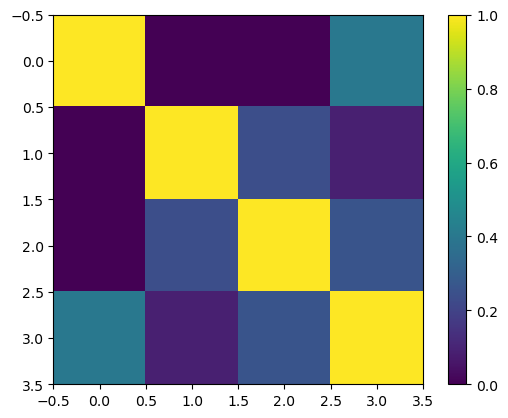

array([[1.        , 0.        , 0.        , 0.40158558],
       [0.        , 1.        , 0.24015622, 0.08789535],
       [0.        , 0.24015622, 1.        , 0.2605611 ],
       [0.40158558, 0.08789535, 0.2605611 , 1.        ]])

In [ ]:
# 코사인 유사도(cosine similarity)를 활용해 문서 간 유사도를 계산하고 시각화합니다.
# 실무에서는 문서(또는 벡터) 간의 유사도를 빠르게 비교할 때 자주 사용합니다.
# 1. cosine_similarity: 두 벡터 집합의 유사도를 0~1 사이 값으로 반환합니다.
# 2. plt.imshow: 유사도 행렬을 이미지로 시각화합니다. (색이 진할수록 유사도가 높음)
from sklearn.metrics.pairwise import cosine_similarity

cos_matrix = cosine_similarity(X.toarray(), X.toarray())  # 문서 간 유사도 행렬 계산
plt.imshow(cos_matrix)  # 유사도 행렬 시각화
plt.colorbar()
plt.show()
cos_matrix  # 유사도 수치 확인

In [ ]:
# 특정 문서(my_index)와 가장 유사한 문서의 인덱스를 내림차순으로 정렬합니다.
# 실무에서는 추천 시스템, 문서 클러스터링 등에서 자주 활용합니다.
my_index = 1  # 기준이 되는 문서 인덱스
np.argsort(cos_matrix[my_index], axis=0)[::-1]  # 유사도 높은 순서대로 인덱스 반환

array([1, 2, 3, 0])

In [ ]:
# 위와 동일하게, 기준 문서(my_index)와 유사도가 높은 문서 인덱스를 내림차순으로 정렬합니다.
# 실전에서는 이 결과를 활용해 유사 문서 추천, 검색 결과 정렬 등에 활용합니다.
my_index = 1
sim_sorted_idx_arr = np.argsort(cos_matrix[my_index],axis=0)[::-1]
sim_sorted_idx_arr

array([1, 2, 3, 0])

# 문장의 유사도를 사용해 추천 시스템 구현하기

Dataset : https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

In [ ]:
# 영화 메타데이터(csv)에서 id, title, overview(줄거리)만 추출해서 데이터프레임으로 만듭니다.
# 실무에서는 대용량 csv를 다룰 때 low_memory=False 옵션을 자주 사용합니다.
import pandas as pd
movies_df = pd.read_csv("movies_metadata.csv", low_memory=False)[['id','title','overview']]
movies_df

,id,title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...
45461,439050,Subdue,Rising and falling between a man and woman.
45462,111109,Century of Birthing,An artist struggles to finish his work while a...
45463,67758,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,227506,Satan Triumphant,"In a small town live two brothers, one a minis..."


In [ ]:
# 데이터프레임의 전체 정보(행/열 수, 타입, 결측치 등)를 확인합니다.
# 실무에서는 데이터 전처리 전 info()로 데이터 상태를 꼭 체크합니다.
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45466 non-null  object
 1   title     45460 non-null  object
 2   overview  44512 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [ ]:
# 결측치(누락된 값)가 얼마나 있는지 확인합니다.
# 실전에서는 결측치가 많으면 분석/모델링에 영향을 주기 때문에 반드시 확인합니다.
movies_df.isna().sum()

id            0
title         6
overview    954
dtype: int64

In [ ]:
# 결측치와 중복값을 제거해 데이터 품질을 높입니다.
# 실무에서는 dropna(), drop_duplicates()로 데이터 정제 후 nunique()로 고유값 개수도 확인합니다.
movies_df = movies_df.dropna()
movies_df = movies_df.drop_duplicates()
print(movies_df.nunique())
movies_df

id          44476
title       41371
overview    44303
dtype: int64


,id,title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...
45461,439050,Subdue,Rising and falling between a man and woman.
45462,111109,Century of Birthing,An artist struggles to finish his work while a...
45463,67758,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,227506,Satan Triumphant,"In a small town live two brothers, one a minis..."


In [ ]:
# overview(줄거리) 컬럼을 TF-IDF 벡터로 변환합니다.
# stop_words='english' 옵션은 불용어(의미 없는 단어) 제거에 유용합니다.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])  # 각 영화의 줄거리를 벡터화
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1209924 stored elements and shape (44476, 75827)>

In [ ]:
# 영화 줄거리 벡터(tfidf_matrix)로 코사인 유사도 행렬을 만듭니다.
# 각 영화 간 유사도를 빠르게 비교할 수 있습니다.
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim_df = pd.DataFrame(cosine_sim, index = movies_df.id, columns=movies_df.id)  # 행/열: 영화 id
cos_sim_df

id,862,8844,15602,31357,11862,949,11860,45325,9091,710,...,84419,390959,289923,222848,30840,439050,111109,67758,227506,461257
id,,,,,,,,,,,,,,,,,,,,,
862,1.000000,0.015018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.005932,0.000000
8844,0.015018,1.000000,0.046783,0.000000,0.000000,0.050108,0.000000,0.000000,0.102366,0.000000,...,0.0,0.0,0.0,0.011236,0.0,0.000000,0.066892,0.0,0.021952,0.009248
15602,0.000000,0.046783,1.000000,0.000000,0.025065,0.000000,0.000000,0.006362,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.014011,0.000000
31357,0.000000,0.000000,0.000000,1.000000,0.000000,0.007148,0.000000,0.008905,0.000000,0.000000,...,0.0,0.0,0.0,0.021475,0.0,0.026266,0.000000,0.0,0.009491,0.016356
11862,0.000000,0.000000,0.025065,0.000000,1.000000,0.000000,0.030204,0.000000,0.032661,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.006975,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,0.000000,0.000000,0.000000,0.026266,0.000000,0.025293,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000
111109,0.000000,0.066892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049829,...,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000
67758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038264,0.000000,...,0.0,0.0,0.0,0.031415,0.0,0.000000,0.000000,1.0,0.000000,0.000000


In [ ]:
# 토이스토리와 유사도가 가장 높은 영화를 10개 추출합니다.
# 실무에서는 쿼리 영화의 id를 기준으로 유사도 상위 N개를 뽑아 추천에 활용합니다.
q_movie_name = 'Toy Story'
q_movie_id = movies_df[movies_df['title'] == q_movie_name].id
print(q_movie_id)
top_10_movies = cos_sim_df[q_movie_id][:11]  # 자기 자신 포함 11개

0    862
Name: id, dtype: object


In [ ]:
# 유사도가 높은 영화 10개의 id를 확인합니다.
# 이 id로 실제 영화 정보를 조회할 수 있습니다.
top_10_movies.index

Index(['862', '8844', '15602', '31357', '11862', '949', '11860', '45325',
       '9091', '710', '9087'],
      dtype='object', name='id')

In [39]:
# 유사도 높은 10개 영화의 id를 가지고 반복문을 돌면서 title이랑 overview 가져오는것 뿐.

for i, movie_idx in enumerate(top_10_movies.index):
    movie_title = movies_df[movies_df['id'] == movie_idx]['title'].values[0]
    movie_overview = movies_df[movies_df['id'] == movie_idx]['overview'].values[0]

    print(f'{i} : {movie_title} - {movie_overview}\n')

0 : Toy Story - Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.

1 : Jumanji - When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.

2 : Grumpier Old Men - A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. B